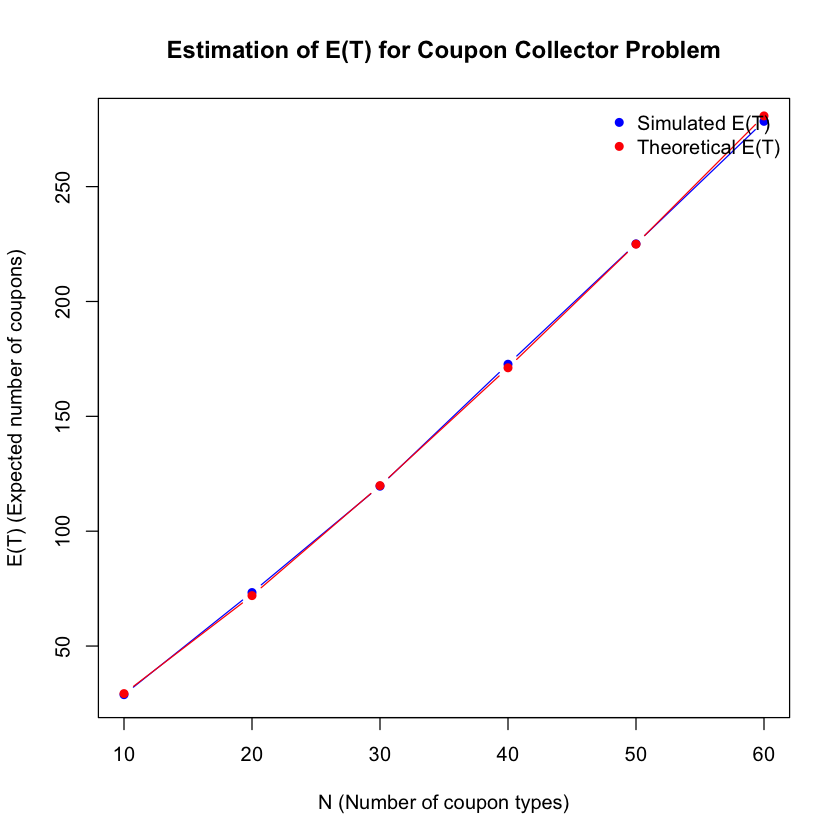

In [4]:
# Function to simulate the coupon collector problem and estimate E(T)
simulate_coupon_collector <- function(N, Nsim) {
  expected_T <- numeric(Nsim)
  for (i in 1:Nsim) {
    collected <- numeric(N)
    total_coupons <- 0
    while (sum(collected) < N) {
      total_coupons <- total_coupons + 1
      coupon <- sample(1:N, 1)
      collected[coupon] <- 1
    }
    expected_T[i] <- total_coupons
  }
  return(mean(expected_T))
}

# Values of N to consider
N_values <- c(10, 20, 30, 40, 50, 60)

# Number of simulations
Nsim <- 1000

# Simulation results
simulated_ET <- numeric(length(N_values))
for (i in 1:length(N_values)) {
  simulated_ET[i] <- simulate_coupon_collector(N_values[i], Nsim)
}

# Theoretical approximation for E(T)
theoretical_ET <- function(N) {
  return(N * log(N) + 0.577 * N + 0.5)
}

# Plotting
plot(N_values, simulated_ET, type = "b", pch = 16, col = "blue",
     xlab = "N (Number of coupon types)", ylab = "E(T) (Expected number of coupons)",
     main = "Estimation of E(T) for Coupon Collector Problem")
lines(N_values, theoretical_ET(N_values), type = "b", pch = 16, col = "red")
legend("topright", legend = c("Simulated E(T)", "Theoretical E(T)"),
       col = c("blue", "red"), pch = 16, bty = "n")
